<a href="https://colab.research.google.com/github/mayukbasu/Chatbot-/blob/main/NLP_27)_Chatbot_using_Python_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
uploaded = files.upload() 

Saving test_qa.txt to test_qa.txt
Saving train_qa.txt to train_qa.txt


In [ ]:
import pickle
import numpy as np

In [ ]:
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [ ]:
with open("test_qa.txt", "rb") as fp:    # Unpickling
    test_data =  pickle.load(fp)


# **Exploring the Format of the Data**

In [ ]:
type(test_data)

list

In [ ]:
type(train_data)

list

In [ ]:
len(test_data)

1000

In [ ]:
len(train_data)

10000

In [ ]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [ ]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [ ]:
train_data[0][0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [ ]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [ ]:
train_data[0][2]

'no'


## **Setting up Vocabulary of All Words**

In [ ]:
# Create a set that holds the vocab words
vocab = set()

In [ ]:
all_data = test_data + train_data

In [ ]:
len(all_data)

11000

In [ ]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [ ]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

    # In case you don't know what a union of sets is:
    # https://www.programiz.com/python-programming/methods/set/union

In [ ]:
vocab.add('no')

In [ ]:
vocab.add('yes')

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
vocab_len = len(vocab) + 1          #we add an extra space to hold a 0 for Keras's pad_sequences

In [ ]:
vocab_len

38

In [ ]:
all_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
all_story_len = [len(data[0]) for data in all_data]

In [ ]:
#all_story_len

In [ ]:
#Longest Story

max(all_story_len)

156

In [ ]:
max_story_len = max(all_story_len)
max_story_len

156

In [ ]:
#Longest question

max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
max_question_len

6

## **Vectorizing the Data**

In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [ ]:
tokenizer.word_index

{'.': 30,
 '?': 29,
 'apple': 11,
 'back': 1,
 'bathroom': 16,
 'bedroom': 27,
 'daniel': 36,
 'discarded': 4,
 'down': 6,
 'dropped': 37,
 'football': 15,
 'garden': 9,
 'got': 17,
 'grabbed': 24,
 'hallway': 13,
 'in': 32,
 'is': 21,
 'john': 8,
 'journeyed': 23,
 'kitchen': 22,
 'left': 3,
 'mary': 35,
 'milk': 12,
 'moved': 31,
 'no': 5,
 'office': 34,
 'picked': 26,
 'put': 18,
 'sandra': 19,
 'the': 25,
 'there': 7,
 'to': 33,
 'took': 10,
 'travelled': 14,
 'up': 2,
 'went': 20,
 'yes': 28}

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

In [ ]:
# Separating just the stories, ques and answers

for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)

In [ ]:
# train_story_text

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
# train_story_seq

In [ ]:
len(train_story_text)

10000

In [ ]:
len(train_story_seq)

10000

In [ ]:
word_index = tokenizer.word_index            # appending text and seq

In [ ]:
word_index

{'.': 30,
 '?': 29,
 'apple': 11,
 'back': 1,
 'bathroom': 16,
 'bedroom': 27,
 'daniel': 36,
 'discarded': 4,
 'down': 6,
 'dropped': 37,
 'football': 15,
 'garden': 9,
 'got': 17,
 'grabbed': 24,
 'hallway': 13,
 'in': 32,
 'is': 21,
 'john': 8,
 'journeyed': 23,
 'kitchen': 22,
 'left': 3,
 'mary': 35,
 'milk': 12,
 'moved': 31,
 'no': 5,
 'office': 34,
 'picked': 26,
 'put': 18,
 'sandra': 19,
 'the': 25,
 'there': 7,
 'to': 33,
 'took': 10,
 'travelled': 14,
 'up': 2,
 'went': 20,
 'yes': 28}

# **Functionalize Vectorization**

    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''

In [ ]:
def vectorize_stories(data, word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):

  # X = stories
  X = []

  # Questions
  Xq = []

  # Y = Correct answers (yes/no)
  Y = []
  

  for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
  # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
  # RETURN TUPLE FOR UNPACKING
  return (pad_sequences(X, maxlen = max_story_len),pad_sequences(Xq, maxlen = max_question_len), np.array(Y))

In [ ]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [ ]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [ ]:
inputs_test

array([[ 0,  0,  0, ..., 25, 27, 30],
       [ 0,  0,  0, ..., 25,  9, 30],
       [ 0,  0,  0, ..., 25,  9, 30],
       ...,
       [ 0,  0,  0, ..., 25, 11, 30],
       [ 0,  0,  0, ..., 25,  9, 30],
       [ 0,  0,  0, ..., 11,  7, 30]], dtype=int32)

In [ ]:
queries_test

array([[21,  8, 32, 25, 22, 29],
       [21,  8, 32, 25, 22, 29],
       [21,  8, 32, 25,  9, 29],
       ...,
       [21, 35, 32, 25, 27, 29],
       [21, 19, 32, 25,  9, 29],
       [21, 35, 32, 25,  9, 29]], dtype=int32)

In [ ]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tokenizer.word_index['yes']

28

In [ ]:
tokenizer.word_index['no']

5

In [ ]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])


## **Creating the Model**

In [ ]:
from keras.models import Sequential, Model

from keras.layers.embeddings import Embedding

from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM


**Placeholders for Inputs**

Recall we technically have two inputs, stories and questions. So we need to use placeholders. Input() is used to instantiate a Keras tensor.

PLACEHOLDER shape = (max_story_len, batch_size)


In [ ]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [ ]:
# vocab_len

vocab_size = len(vocab) + 1


# **Building the Networks**

To understand why we chose this setup, make sure to read the paper we are using:

    Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus, "End-To-End Memory Networks", http://arxiv.org/abs/1503.08895

# **Encoders**
# ***Input Encoder m***

In [ ]:
# Input gets embedded to a sequence of vectors

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size, output_dim = 64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)


## **Input Encoder c**

In [ ]:
# embed the input into a sequence of vectors of size query_maxlen

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size, output_dim = max_question_len))
input_encoder_c.add(Dropout(0.3)) 

# output: (samples, story_maxlen, query_maxlen)

## **Question Encoder**

In [ ]:
# embed the question into a sequence of vectors

question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size, output_dim = 64, input_length = max_question_len))
question_encoder.add(Dropout(0.3))

# output: (samples, query_maxlen, embedding_dim)


## **Encode the Sequences**

In [ ]:
# Encoder(Input) ---> Encoded

# encode input sequence and questions (which are indices)
# to sequences of dense vectors

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

***Use dot product to compute the match between first input vector seq and the query***

In [ ]:
# shape: `(samples, story_maxlen, query_maxlen)`

match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

***Add this match matrix with the second input vector sequence***

In [ ]:
# add the match matrix with the second input vector sequence

response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

***Concatenate***

In [ ]:
# concatenate the match matrix with the question vector sequence

answer = concatenate([response, question_encoded])

In [ ]:
answer

<tf.Tensor 'concatenate/concat:0' shape=(None, 6, 220) dtype=float32>

In [ ]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

ValueError: ignored

In [ ]:
# Regularization with Dropout

answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [ ]:
# we output a probability distribution over the vocabulary

answer = Activation('softmax')(answer)

In [ ]:
# build the final model

model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, None, 64)     2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
_______________________________________________________________________________________

In [ ]:
# train

history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 5s 16ms/step - loss: 3.5922 - accuracy: 0.4947 - val_loss: 3.5581 - val_accuracy: 0.4970
Epoch 2/120
313/313 [==============================] - 4s 14ms/step - loss: 3.4829 - accuracy: 0.4981 - val_loss: 3.4360 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 4s 14ms/step - loss: 3.3977 - accuracy: 0.5012 - val_loss: 3.3222 - val_accuracy: 0.4970
Epoch 4/120
313/313 [==============================] - 5s 14ms/step - loss: 3.3530 - accuracy: 0.5014 - val_loss: 3.2486 - val_accuracy: 0.4970
Epoch 5/120
313/313 [==============================] - 5s 14ms/step - loss: 3.3169 - accuracy: 0.5012 - val_loss: 3.2081 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 4s 14ms/step - loss: 3.2787 - accuracy: 0.5012 - val_loss: 3.1887 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 5s 15ms/step - loss: 3.2489 - accuracy: 0.5014 - val_loss: 3.1991 - val_accuracy:

## **Saving the Model**

In [ ]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)


## **Evaluating the Model**
# **Plotting Out Training History**


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


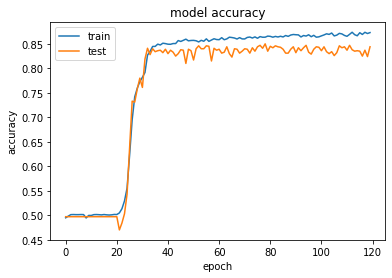

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## **Evaluating on Given Test Set**

In [ ]:
model.load_weights(filename)

In [ ]:
pred_results = model.predict(([inputs_test, queries_test]))

In [ ]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [ ]:
pred_results

array([[0.02517734, 0.02517734, 0.02517734, ..., 0.02517734, 0.02517734,
        0.02517734],
       [0.02517734, 0.02517734, 0.02517734, ..., 0.02517734, 0.02517734,
        0.02517734],
       [0.02517734, 0.02517734, 0.02517734, ..., 0.02517734, 0.02517734,
        0.02517734],
       ...,
       [0.02517734, 0.02517734, 0.02517734, ..., 0.02517734, 0.02517734,
        0.02517734],
       [0.02517734, 0.02517734, 0.02517734, ..., 0.02517734, 0.02517734,
        0.02517734],
       [0.02517734, 0.02517734, 0.02517734, ..., 0.02517734, 0.02517734,
        0.02517734]], dtype=float32)

In [ ]:
pred_results.shape

(1000, 38)

In [ ]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [ ]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [ ]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


# **Generate prediction from model**

In [ ]:
val_max = np.argmax(pred_results[0])

In [ ]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [ ]:
print("Predicted answer is: ", k)

Predicted answer is:  no


In [ ]:
print("Probability of certainty was: ", pred_results[0][val_max])


# **Writing Your Own Stories and Questions**

Remember you can only use words from the existing vocab


In [ ]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [ ]:
# Note the whitespace of the periods

my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [ ]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [ ]:
my_question = "Is the football in the garden ?"

In [ ]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [ ]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [ ]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [ ]:
pred_results = model.predict(([ my_story, my_ques]))

In [ ]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.06843803
